**Titulo:** *Gradient Descent*
    
**Autor:** *Luis Vaciero*
    
**Introduccion:** *Programacion el descenso de gradiente en Python en base al archivo de datos facilitado en clase.*


**Librerias**

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

*Datos*

In [23]:
data = pd.read_csv("4_1_data.csv")
data.head()

,score-1,score-2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [24]:
scores = data[['score-1', 'score-2']].values
label = data['label'].values

**Clasificación Binaria**

 *Dividimos la muestra entre dos elementos binarios, en este caso label=0 o label=1.*
 
 *Y los representamos graficamente*

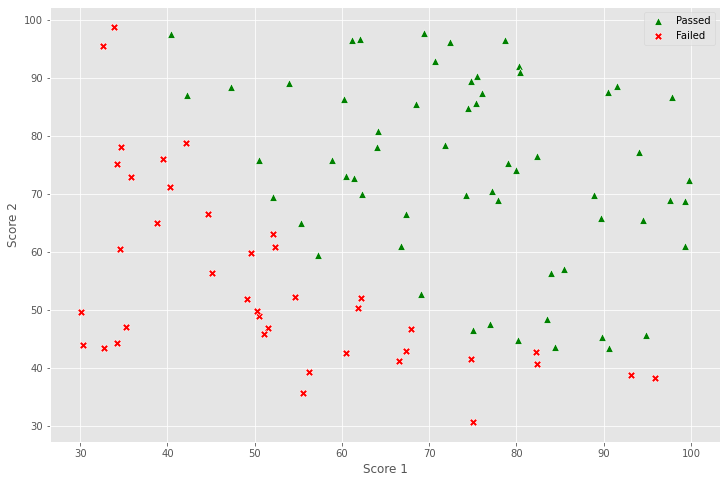

In [25]:
passed = (label == 1).reshape(100, 1)
failed = (label == 0).reshape(100, 1)

ax = sns.scatterplot(x = scores[passed[:, 0], 0],
                     y = scores[passed[:, 0], 1],
                     marker = "^",
                     color = "green",
                     s = 60)
sns.scatterplot(x = scores[failed[:, 0], 0],
                y = scores[failed[:, 0], 1],
                marker = "X",
                color = "red",
                s = 60)

ax.set(xlabel="Score 1", ylabel="Score 2")
ax.legend(["Passed", "Failed"])
plt.show();

**Definimos la funcion Sigmoide**



In [26]:
def Sigmoid(x):    
    return 1/ (1 + np.exp(-x))

In [27]:
Sigmoid(0) # nos devuelve el valor de la función

0.5

**Funcion de coste**

In [28]:
def cost_function(parametros, x, y):
    n = len(x)
    g = Sigmoid(np.dot(x , parametros))
    error = (y * np.log(g)) + ((1 - y) * np.log(1 - g))
    cost = -1 / n * sum(error)
    gradient = 1 / n * np.dot(x.transpose(), (g - y))
    return cost[0] , gradient

*Estandarizamos*

In [29]:
mean_scores = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)
scores = (scores - mean_scores) / std_scores 

In [30]:
rows = scores.shape[0]
cols = scores.shape[1]

*Definimos los parametros iniciales*

In [31]:
X = np.append(np.ones((rows, 1)), scores, axis=1) 
y = label.reshape(rows, 1)

parametros_init = np.zeros((cols + 1, 1))
cost, gradient = cost_function(parametros_init, X, y)

print("Cost at initialization", cost)
print("Gradient at initialization:", gradient)

Cost at initialization 0.693147180559946
Gradient at initialization: [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


*Definimos la funcion del gradiante*

In [32]:
def gradient_descent(x, y, parametros, alpha, iterations):
    costs = []
    for i in range(iterations):
        cost, gradient = cost_function(parametros, x, y)
        parametros -= (alpha * gradient)
        costs.append(cost)
    return parametros, costs

**Elegimos nuestro *ratio de aprendizaje* y el numero de *interacciones* que queremos**

In [33]:
parametros, costs = gradient_descent(X, y, parametros_init, 0.2, 1200)

In [34]:
print("parametros tras hacer el gradient descent:", parametros)
print("Resulting cost:", costs[-1])

parametros tras hacer el gradient descent: [[1.55569184]
 [3.64668088]
 [3.39032616]]
Resulting cost: 0.2043093167032965


**Visualizamos la grafica de la Gradiante**

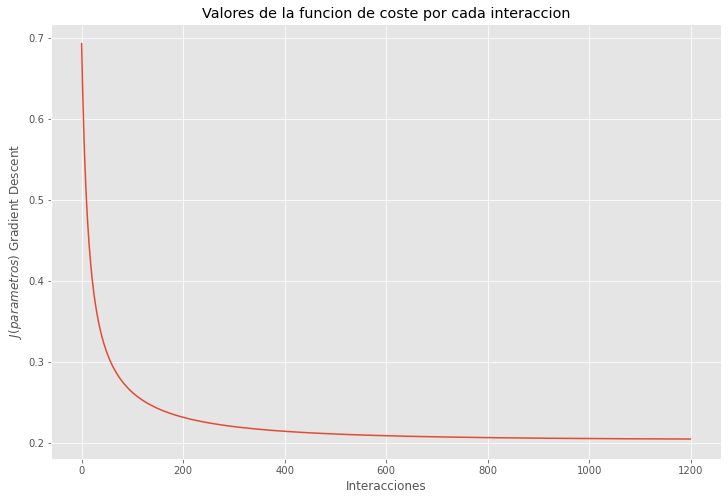

In [35]:
plt.plot(costs)
plt.xlabel("Interacciones")
plt.ylabel("$J(parametros)$ Gradient Descent")
plt.title("Valores de la funcion de coste por cada interaccion");

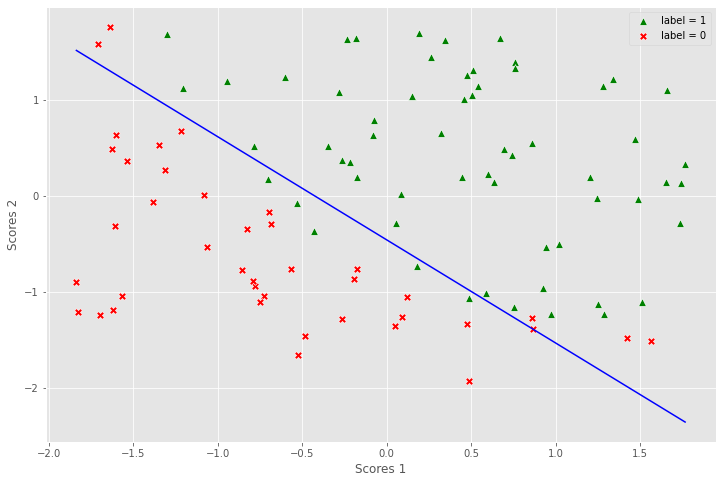

In [36]:

sns.scatterplot(x = X[passed[:, 0], 1],
                y = X[passed[:, 0], 2],
                marker = "^",
                color = "green",
                s = 60)
ax = sns.scatterplot(x = X[failed[:, 0], 1],
                    y = X[failed[:, 0], 2],
                    marker = "X",
                    color = "red",
                    s = 60)

ax.legend(["label = 1", "label = 0"])
ax.set(xlabel="Scores 1", ylabel="Scores 2")

x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(parametros[0] + parametros[1] * x_boundary) / parametros[2]

sns.lineplot(x = x_boundary, y = y_boundary, color="blue")
plt.show();

**Precision**

In [37]:
def predict(parametros, x):
    resultados = x.dot(parametros)
    return resultados > 0

In [38]:
p = predict(parametros, X)
print("Precision:", sum(p==y)[0],"%")

Precision: 89 %


**Ejemplo:**

*introducir valores aleatorios*

In [43]:
valores = np.array([70,60])

*Resultado*

In [44]:
test = (valores - mean_scores)/std_scores
test = np.append(np.ones(1), test)
probability = Sigmoid(test.dot(parametros))
print("Con un score-1 de", valores[0], "y un score-2 de", valores[1], "tiene una posibilidad del ",
      np.round(probability[0], 2),"de tener label = 1.")

Con un score-1 de 70 y un score-2 de 60 tiene una posibilidad del  0.77 de tener label = 1.
